In [6]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns

In [7]:
file_to_load = "Resources/hotel_bookings.csv"
# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

In [8]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
len(purchase_data)

119390

## DATA CLEANING

In [10]:
#Checking missing values
purchase_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
#Country, agent, and company have missing values. Fill data with 0s. 
clean_purchase_data = purchase_data.fillna(value=0)

# 1. Where do the guests come from?

> - To answer this question the data was filtered by a registered country and a confirmed reservation
> - For presentation reasons up to 1000 guest per country were considered for the second pie plot
> - After the analysis the mayor percentage (**28%**) of guests came from Portugal, which make sense as the data provides information from that specific country.
> - An interesting fact is that the second country with the highest percentage of guests (**13%**) is Great Britain despite the distance
> - Another interesting fact is that although Spain is very close, it is the country with the fourth percentage of guests (**9%**)

In [12]:
#Guests by country which completed a reservation and had register a country
countries_df = clean_purchase_data["country"].loc[(clean_purchase_data["is_canceled"]==0)&(clean_purchase_data["country"]!=0)]
# Count the amount of guests per country
amount_countries = countries_df.value_counts()
# Get the unique countries
country_labels = countries_df.unique().tolist()

### Pie Plot (Guests Per country)

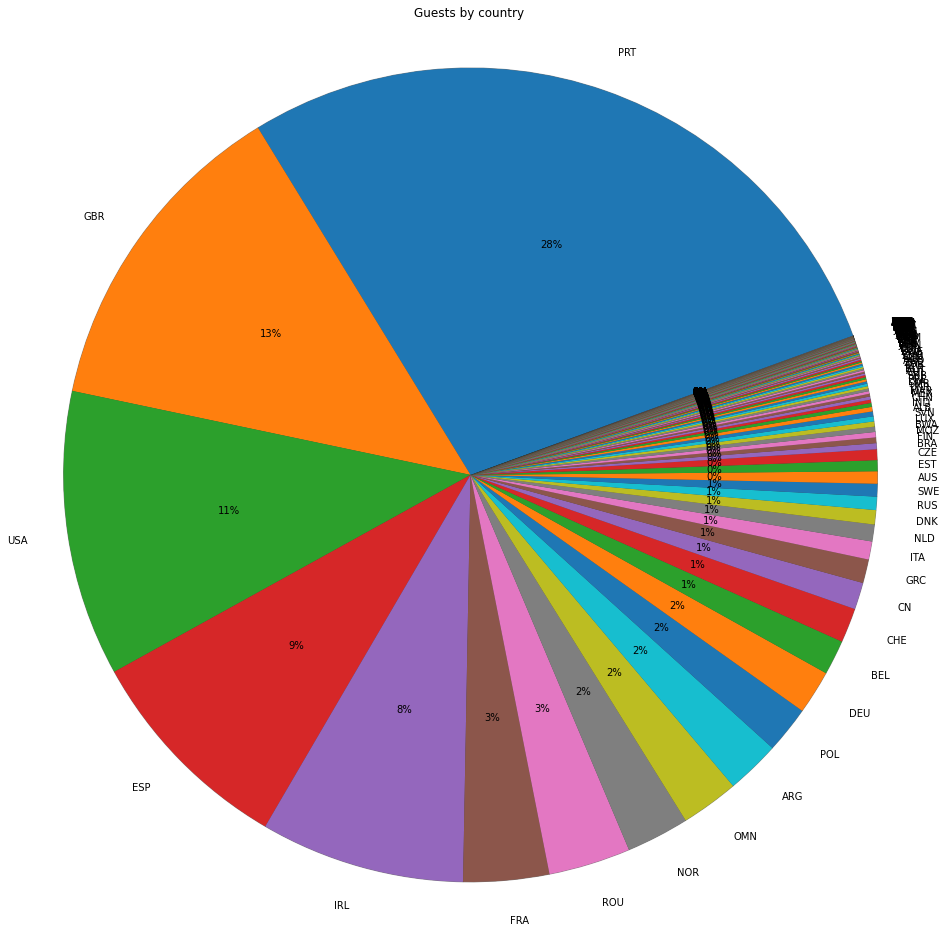

In [13]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.5,0,2.5,2.5)

fig = ax1.pie(amount_countries, 
              labels=country_labels, 
              startangle=20, 
              autopct='%1.0f%%', # This line gets the rounded percentage 
              shadow=True, 
              radius=2800)
plt.axis("equal")
plt.title("Guests by country")
plt.show()

### Pie Plot  (Up to 1000 Guest by Country for a better representation)

In [14]:
# Count the amount of guests per country
reduced_amount_countries = amount_countries.loc[amount_countries>1000]

# Get the countries names
country_labels = reduced_amount_countries.index.tolist()


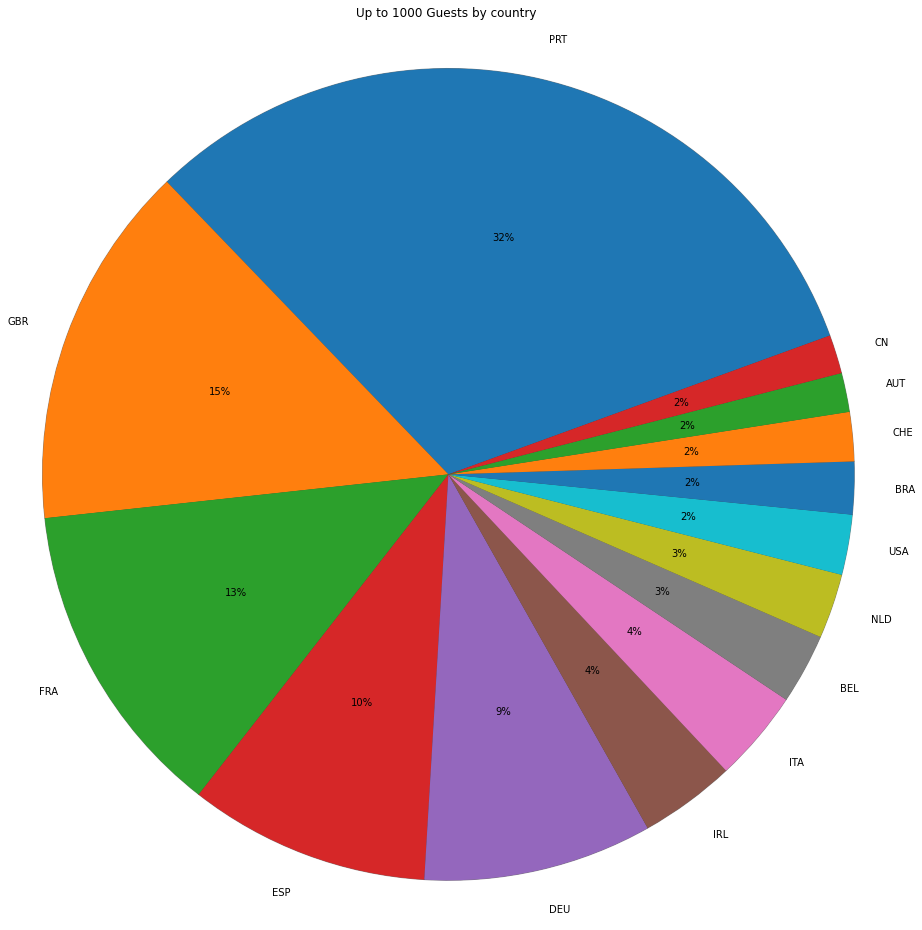

In [15]:

fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.5,0,2.5,2.5)

fig = ax1.pie(reduced_amount_countries, 
              labels=country_labels, 
              startangle=20, 
              autopct='%1.0f%%', # This line gets the rounded percentage 
              shadow=True, 
              radius=2800)
plt.axis("equal")
plt.title("Up to 1000 Guests by country")
plt.show()

# 2. How much do guests pay for a room per night?

> <font color="red">PROPONGO QUE EN ESTA PARTE PONGAMOS EL RESULTADO DEL ANALISIS DESCRIBIENDO LOS HALLAZGOS Y TRATANDO DE RESPONDER LA PREGUNTA</font>

In [199]:
#get non cancel reserv
clean_data_NCancel=clean_purchase_data.loc[clean_purchase_data['is_canceled']==0]
clean_data_NCancel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [200]:
avg_ADR=clean_data_NCancel['adr'].mean()
avg_ADR

99.98769297288668

In [201]:
by_distChannel = clean_data_NCancel['distribution_channel'].value_counts()
by_distChannel

TA/TO        57718
Direct       12088
Corporate     5203
GDS            156
Undefined        1
Name: distribution_channel, dtype: int64

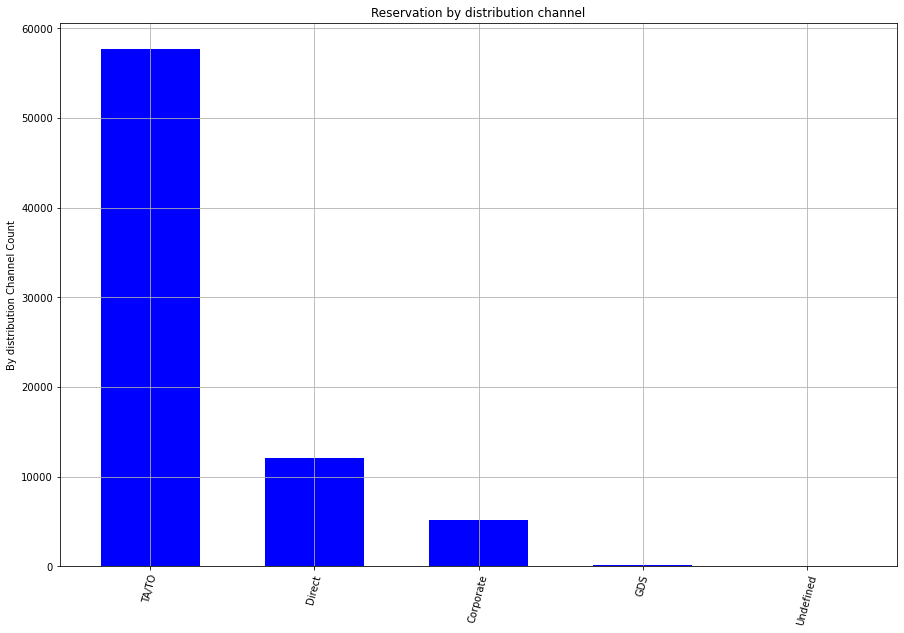

In [203]:
plt.figure(figsize=(15, 10))
DistChannel_plot = by_distChannel.plot(kind='bar', rot=75, color = "b", title="Reservation by distribution channel", width= .6)

DistChannel_plot.set_ylabel("By distribution Channel Count")
plt.grid()
plt.show()

Most of the reservation came throug Travel agents and Tour operators followed by Direct reservation to the Hotels

In [205]:
df_By_distriChan = clean_data_NCancel.groupby(['distribution_channel'])
df_By_distriChan

In [206]:
df_By_distriChan['adr'].describe().head()

,count,mean,std,min,25%,50%,75%,max
distribution_channel,,,,,,,,
Corporate,5203.0,67.247982,32.794041,0.00,42.00,65.0,89.00,508.0
Direct,12088.0,106.038609,61.842170,-6.38,65.16,96.0,141.00,451.5
GDS,156.0,119.933462,42.500997,0.00,91.50,111.5,149.25,209.0
TA/TO,57718.0,101.617635,46.287003,0.00,71.97,95.0,125.10,510.0
Undefined,1.0,112.700000,NaN,112.70,112.70,112.7,112.70,112.7


In [207]:
Forplot_ADRbyDistr = df_By_distriChan['adr'].mean()
Forplot_ADRbyDistr 

distribution_channel
Corporate     67.247982
Direct       106.038609
GDS          119.933462
TA/TO        101.617635
Undefined    112.700000
Name: adr, dtype: float64

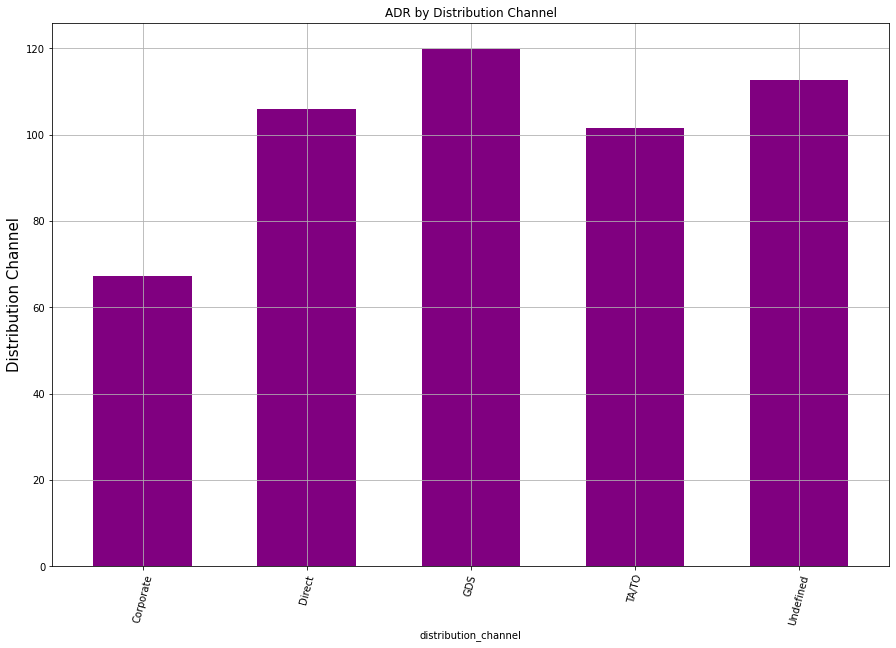

In [223]:
plt.figure(figsize=(15, 10))
DistChannelADR_plot = Forplot_ADRbyDistr.plot(kind='bar', rot=75, color = "purple", title="ADR by Distribution Channel", width= .6)

DistChannelADR_plot.set_ylabel("By distribution Channel Count", fontsize=15)
DistChannelADR_plot.set_ylabel("Distribution Channel", fontsize=15)
plt.grid()
plt.show()

On average the Cost of the Daily rate is higher when reservations area made using a Global Distribution System (GDS) and we have the lower rates for Corporate clientes. Travel Agencies have the second lowest rate.

#  3. How does the price per night vary over the year?

In [211]:
df_By_month= clean_data_NCancel.groupby(['arrival_date_month'])
df_By_month

In [212]:
df_By_month['adr'].describe().head()

,count,mean,std,min,25%,50%,75%,max
arrival_date_month,,,,,,,,
April,6565.0,97.877849,39.839278,0.0,74.45,95.00,118.25,336.00
August,8638.0,142.088795,60.636553,0.0,99.00,131.75,179.10,426.25
December,4409.0,78.920238,46.628637,0.0,52.00,72.07,95.70,451.50
February,5372.0,72.419429,31.569510,0.0,51.00,73.53,88.00,284.20
January,4122.0,67.001050,29.782005,0.0,45.00,66.00,85.00,284.20


In [219]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

Forplot_ADRbyMonth = df_By_month['adr'].mean()
Forplot_ADRbyMonth = Forplot_ADRbyMonth.reindex(months)
Forplot_ADRbyMonth

arrival_date_month
January       67.001050
February      72.419429
March         77.331574
April         97.877849
May          104.842342
June         114.589636
July         129.253758
August       142.088795
September    107.277159
October       86.830198
November      70.505169
December      78.920238
Name: adr, dtype: float64

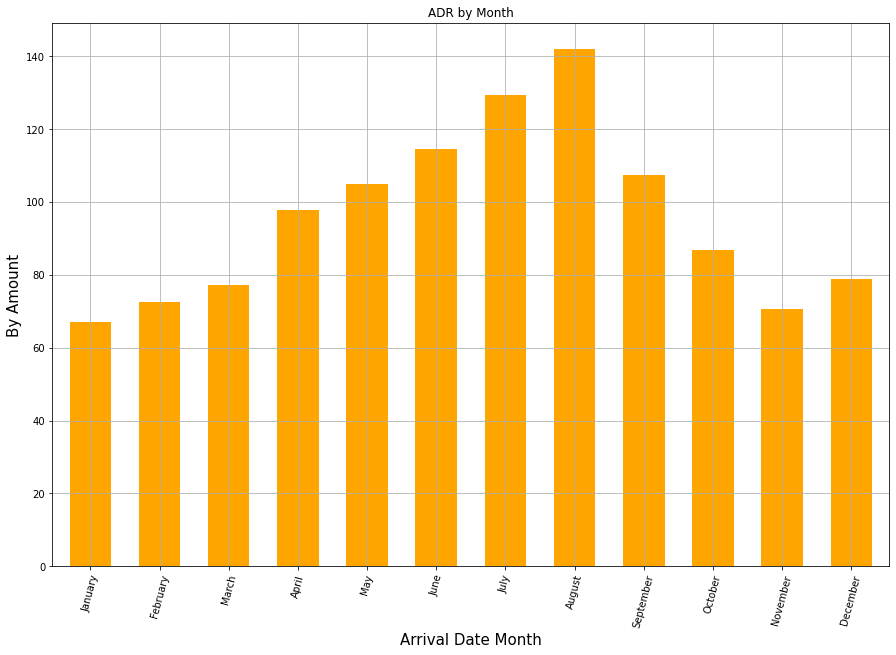

In [222]:
plt.figure(figsize=(15, 10))
MonthADR_plot = Forplot_ADRbyMonth.plot(kind='bar', rot=75, color = "orange", title="ADR by Month", width= .6)

MonthADR_plot.set_ylabel("By Amount", fontsize=15)
MonthADR_plot.set_xlabel("Arrival Date Month", fontsize=15)
plt.grid()
plt.show()

The summer months are the most expensive and the winter months are the most affortables

# 4. What is the average price per room?

## How does the price per night vary over the year?

In [238]:
room_purchase_data = clean_purchase_data.loc[clean_purchase_data["is_canceled"]==0]
room_prices = room_purchase_data[["hotel","reserved_room_type","adr","arrival_date_month"]].sort_values("reserved_room_type").dropna()
room_prices


,hotel,reserved_room_type,adr,arrival_date_month
80541,City Hotel,A,68.85,November
90111,City Hotel,A,111.35,May
90112,City Hotel,A,99.66,May
90114,City Hotel,A,128.00,May
90115,City Hotel,A,129.00,June
...,...,...,...,...
26937,Resort Hotel,H,322.00,August
14570,Resort Hotel,L,82.00,July
15855,Resort Hotel,L,172.00,August
911,Resort Hotel,L,200.00,August


In [239]:
rooms_type = room_prices["reserved_room_type"].value_counts().index.tolist()
rooms_type.sort()
rooms_type

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L']

In [240]:
price_per_room = []

for room_type in rooms_type:
    specific_room_type = room_prices.loc[room_prices["reserved_room_type"]==room_type,:]
    price_per_room.append(specific_room_type["adr"])

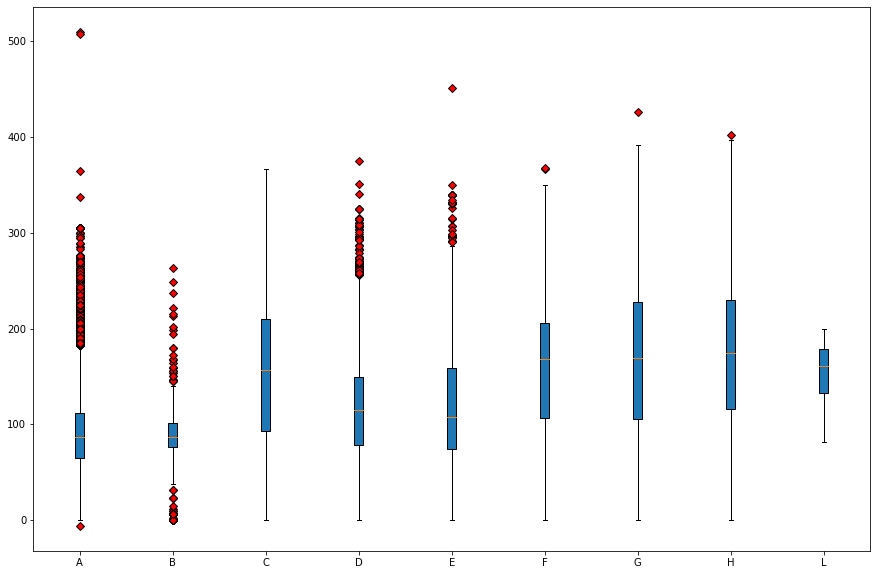

In [241]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
red_diamond = dict(markerfacecolor='r', marker='D')
#ax1.boxplot(room_prices)
ax1.boxplot(price_per_room, labels=rooms_type, widths = 0.1, patch_artist=True, vert=True, flierprops=red_diamond)
plt.show()

> This plot was filtered by Guest with the following criteria
> * Who didn't cancel reservation
> * That has a registered country
> * More than 1000 per country

In [304]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
avg_price_per_month = room_prices.groupby('arrival_date_month').sum()
avg_price_per_month_sorted = avg_price_per_month.reindex(months)

In [305]:
avg_price_per_month_sorted

,adr
arrival_date_month,
January,276178.33
February,389037.17
March,513868.31
April,642568.08
May,745848.42
June,733832.03
July,1023560.51
August,1227363.01
September,685715.60


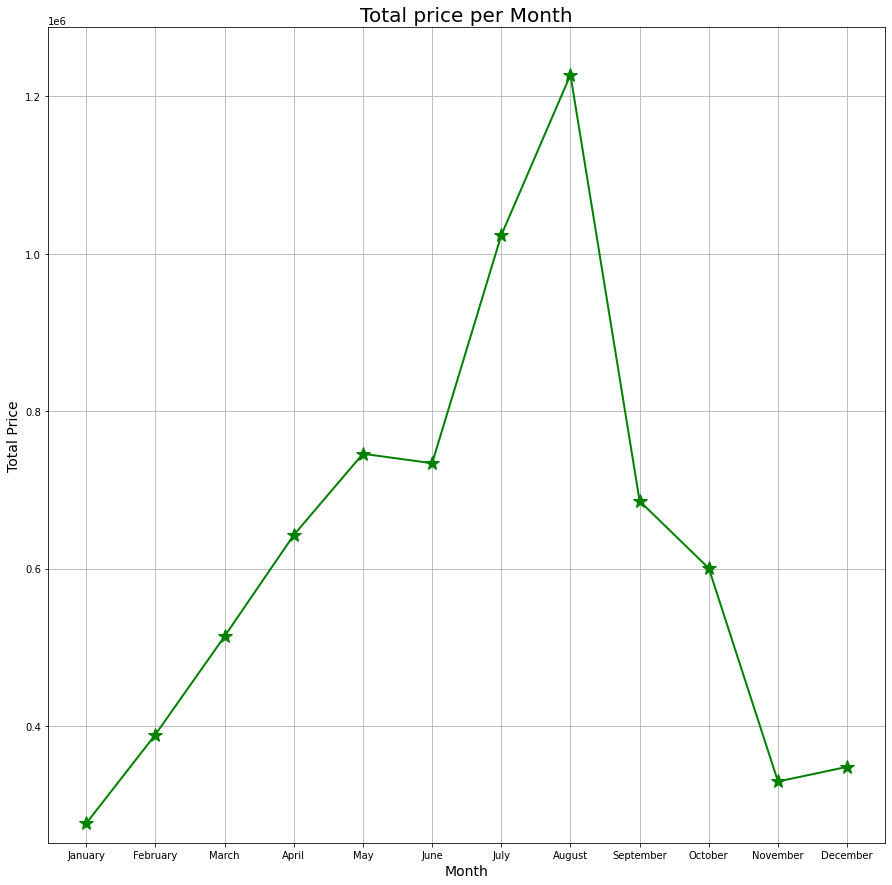

In [308]:
fig1, ax1 = plt.subplots(figsize=(15,15))
plt.title('Total price per Month',fontsize =20)
plt.ylabel('Total Price',fontsize =14)
plt.xlabel('Month',fontsize =14)

# ADR Line
plt.plot(avg_price_per_month_sorted, linewidth=2, markersize=15, marker="*",color="green")

scale_factor = .5
ymin, ymax = plt.ylim()

plt.ylim(ymin * 1.1, ymax * 1.01)
plt.grid()
plt.show()

In [299]:
ymax

1274922.2439999948

# 4. Which are the most busy month?

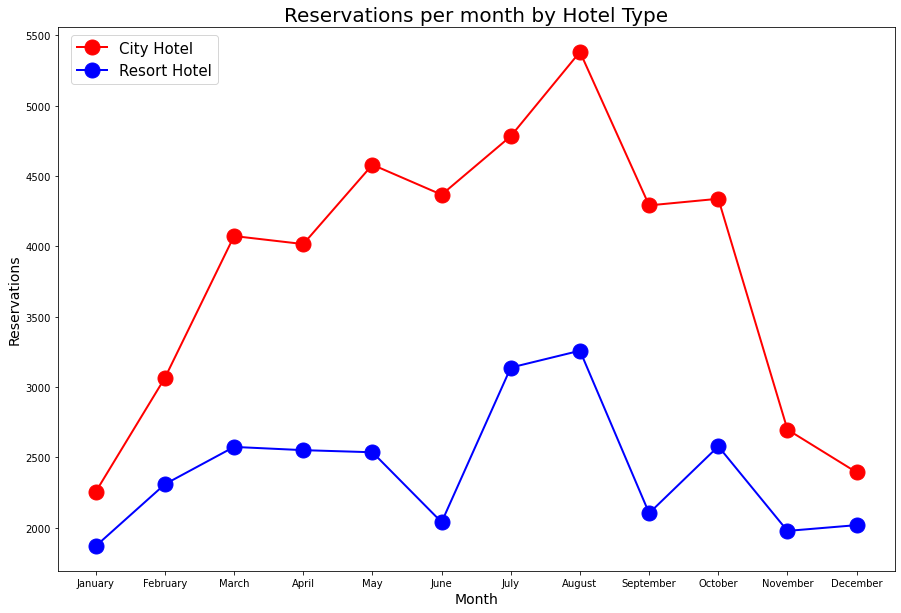

In [224]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

city_hotel = clean_purchase_data.loc[(clean_purchase_data["hotel"]=="City Hotel") & 
                                     (clean_purchase_data["is_canceled"]==0)]

resort_hotel = clean_purchase_data.loc[(clean_purchase_data["hotel"]=="Resort Hotel") & 
                                     (clean_purchase_data["is_canceled"]==0)]


city_hotel_monthly   = city_hotel.groupby("arrival_date_month")["hotel"].count()
resort_hotel_monthly = resort_hotel.groupby("arrival_date_month")["hotel"].count()

city_hotel_monthly_sorted   = city_hotel_monthly.reindex(months)
resort_hotel_monthly_sorted = resort_hotel_monthly.reindex(months)

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Reservations per month by Hotel Type',fontsize =20)
plt.ylabel('Reservations',fontsize =14)
plt.xlabel('Month',fontsize =14)

# City Hotel Line
plt.plot(city_hotel_monthly_sorted, linewidth=2, markersize=15,marker="o",color="red")
# Resort Hotel Line
plt.plot(resort_hotel_monthly_sorted, linewidth=2, markersize=15,marker="o",color="blue")
plt.legend(labels=["City Hotel","Resort Hotel"], prop={'size': 15}, bbox_to_anchor=(0.2, 1))

plt.show()



> This plot was filtered by amount of reservations per Month<br>
> Only not canceled reservations were included

***

# 5. How long do people stay at the hotels?

> - The data was filtered by **City Hotel**, **Resort Hotel**, and a confirmed reservation.
> - The analysis considered the sum of **week** and the **weekend** nights.
> - The analysis reveals that the average nights that a guest stays in a **City Hotel** is **2.92** nights and **52** is the maximum number of nights that a guest has stayed in the City Hotel.
> - In the other hand the average nights that a guest stays in a **Resort Hotel** is **4.142892** and **69** is the maximum number of nights a guest has stayed in the Resort Hotel
> - The **25.73 %** of guests stayed **3 nights** at a **City Hotel**, which is considered the biggest percentage
> - The **22.73 %** of guests stayed **1 night** at a **Resort Hotel**, which is considered the biggest percentage

In [164]:
city_hotel = clean_purchase_data.loc[(clean_purchase_data["hotel"]=="City Hotel") & 
                                     (clean_purchase_data["is_canceled"]==0)]

resort_hotel = clean_purchase_data.loc[(clean_purchase_data["hotel"]=="Resort Hotel") & 
                                     (clean_purchase_data["is_canceled"]==0)]

# Getting the percentage of guests per day in a City Hotel
city_hotel_total_days = (city_hotel['stays_in_weekend_nights']+city_hotel['stays_in_week_nights']).value_counts()
city_hotel_total_days.sort_index(inplace=True)
city_hotel_total_days = (city_hotel_total_days/sum(city_hotel_total_days))*100

# Getting the percentage of guests per day in a Resort Hotel
resort_hotel_total_days = (resort_hotel['stays_in_weekend_nights'] + resort_hotel['stays_in_week_nights']).value_counts()
resort_hotel_total_days.sort_index(inplace=True)
resort_hotel_total_days = (resort_hotel_total_days/sum(resort_hotel_total_days))*100

In [165]:
# Getting the average nights per Guest in a City Hotel
city_hotel_means = city_hotel.groupby("hotel").mean()
city_hotel_mean_nights = city_hotel_means["stays_in_weekend_nights"] + city_hotel_means["stays_in_week_nights"]

# Getting the average nights per Guest in a Resort Hotel
resort_hotel_means = resort_hotel.groupby("hotel").mean()
resort_hotel_mean_nights = resort_hotel_means["stays_in_weekend_nights"] + resort_hotel_means["stays_in_week_nights"]

In [166]:
# Creating a new DF with the city and resort hotel total nights per Guest
hotels_total_days = pd.concat([city_hotel_total_days, resort_hotel_total_days], axis=1)
hotels_total_days.fillna(value=0, inplace=True)

In [169]:
hotels_total_days

,0,1
0,0.666263,1.285507
1,19.834300,22.738268
2,23.777797,15.509019
3,25.731159,13.235192
4,16.665225,11.476260
5,6.967639,6.565761
6,2.414121,4.167531
7,2.706152,15.325869
8,0.452107,1.765844
9,0.259583,1.409911


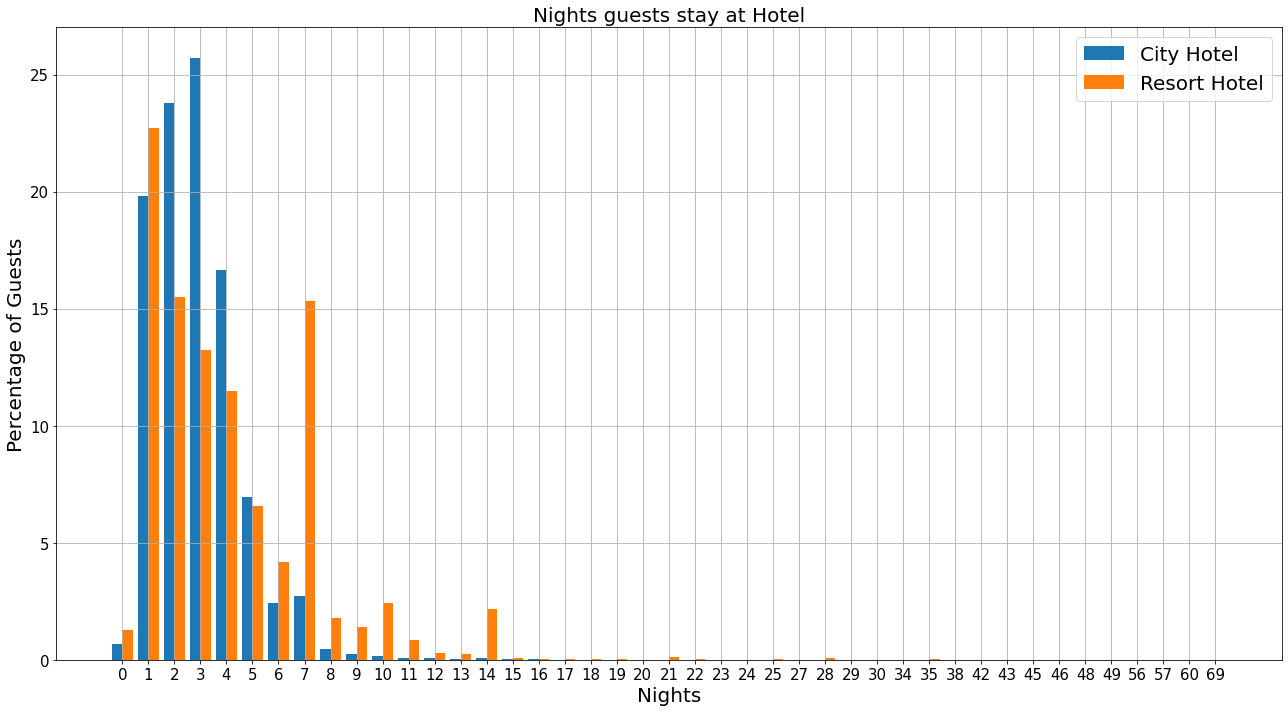

In [179]:
# Creting the Plot
labels  = hotels_total_days.index.tolist()

ch = hotels_total_days[0].tolist()
rh = hotels_total_days[1].tolist()

x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars

fig1, ax1 = plt.subplots(figsize=(18, 10))
ax1.bar(x - width/2, ch, width, label='City Hotel')
ax1.bar(x + width/2, rh, width, label='Resort Hotel')

ax1.set_ylabel('Percentage of Guests', fontsize=20)
ax1.set_xlabel('Nights', fontsize=20)
ax1.set_title('Nights guests stay at Hotel', fontsize=20)
#plt.yticks(fontsize=)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(prop={'size': 20})
# change the fontsize
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)

fig1.tight_layout()
plt.grid()
plt.show()

In [197]:
print(f"The average nights that a guest stays in a City Hotel is {city_hotel_mean_nights[0]:2f}")
print(f"The average nights that a guest stays in a Resort Hotel is {resort_hotel_mean_nights[0]:2f}")
print("---------------------------------------------------------------------")
print(f"The maximum number of nights that a guest has stayed in a City Hotel is {max(hotels_total_days.loc[hotels_total_days[0]>0].index)}")
print(f"The maximum number of nights that a guest has stayed in a Resort Hotel is {max(hotels_total_days.loc[hotels_total_days[1]>0].index)}")

The average nights that a guest stays in a City Hotel is 2.923618
The average nights that a guest stays in a Resort Hotel is 4.142892
---------------------------------------------------------------------
The maximum number of nights that a guest has stayed in a City Hotel is 57
The maximum number of nights that a guest has stayed in a Resort Hotel is 69


> The average nights that a guest stays in a City Hotel is **2.923618**<br>
> The average nights that a guest stays in a Resort Hotel is **4.142892**<br>
> ---------------------------------------------------------------------
> The maximum number of nights that a guest has stayed in a City Hotel is **57**<br>
> The maximum number of nights that a guest has stayed in a Resort Hotel is **69**

In [17]:
file_to_load = "Resources/hotel_bookings.csv"
# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

In [18]:
#Checking missing values
purchase_data.isnull().sum()
#Country, agent, and company have missing values. Fill data with 0s. 
clean_purchase_data = purchase_data.fillna(value=0)
hotel = pd.read_csv('Resources/hotel_bookings.csv', usecols = ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests'])
hotel.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [19]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  object 
 1   is_canceled                  119390 non-null  int64  
 2   adults                       119390 non-null  int64  
 3   children                     119386 non-null  float64
 4   babies                       119390 non-null  int64  
 5   meal                         119390 non-null  object 
 6   country                      118902 non-null  object 
 7   market_segment               119390 non-null  object 
 8   distribution_channel         119390 non-null  object 
 9   reserved_room_type           119390 non-null  object 
 10  booking_changes              119390 non-null  int64  
 11  deposit_type                 119390 non-null  object 
 12  days_in_waiting_list         119390 non-null  int64  
 13 

# How many bookings were canceled?
# Which month have the highest number of cancelations?


In [20]:
hotel_cancel = hotel['hotel'].value_counts()

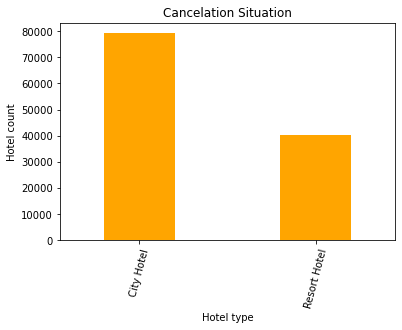

In [21]:
#Cancellations City hotel vs. Resort:
cancel_plot = hotel_cancel.plot(kind='bar', rot=75, color = "orange", width= .4, title="Cancelation Situation")
cancel_plot.set_xlabel("Hotel type")
cancel_plot.set_ylabel("Hotel count")
plt.show()

-City Hotels has the highest cancelation rate

In [22]:
#Cancellations percentages
hotel_eda = hotel.copy()
hotel_eda['hotel'].value_counts()
hotel_eda['is_canceled'].value_counts()/hotel.shape[0]*100

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

37,04% of booking were canceled

In [23]:
#Cancellations per month

month = clean_purchase_data["arrival_date_month"].value_counts()
month

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

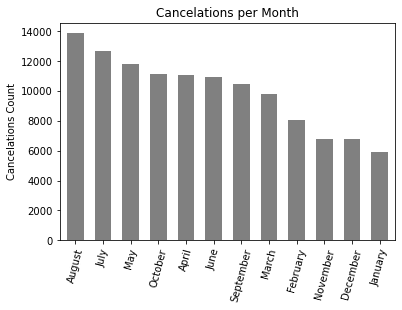

In [24]:
month_plot = month.plot(kind='bar', rot=75, color = "gray", title="Cancelations per Month", width= .6)

month_plot.set_ylabel("Cancelations Count")
plt.show()

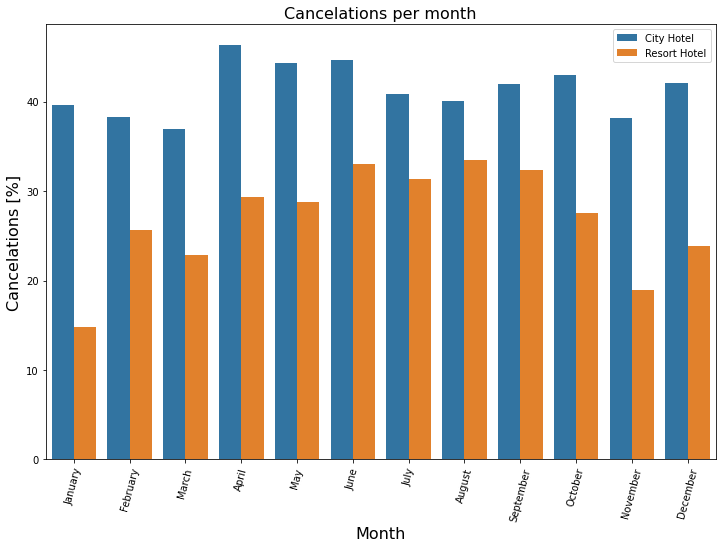

In [25]:
# Canellcations per month City hotel vs. Resort hotel
res_book_per_month = clean_purchase_data[(clean_purchase_data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = clean_purchase_data[(clean_purchase_data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = clean_purchase_data.loc[(clean_purchase_data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = clean_purchase_data.loc[(clean_purchase_data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=75)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

August is the month with more cancelations and January is the month with less cancelations

For city hotels there is not much variance between months
For the Resort hotel it is highest cancelations in the summer and lowest during the winter

# Bookings by market segment

In [26]:
#Bookings with children analiysis:
hotel_eda['all_child'] = hotel_eda['children'] + hotel_eda['babies']

pd.crosstab(hotel_eda['adults'], hotel_eda['all_child'], margins=True, margins_name = 'Total')

all_child,0.0,1.0,2.0,3.0,9.0,10.0,Total
adults,,,,,,,
0,180,4,205,14,0,0,403
1,22577,286,157,6,1,0,23027
2,81557,4658,3369,91,0,2,89677
3,5665,495,41,0,0,0,6201
4,59,3,0,0,0,0,62
5,2,0,0,0,0,0,2
6,1,0,0,0,0,0,1
10,1,0,0,0,0,0,1
20,2,0,0,0,0,0,2


Adults without children = 110,054
Adults with 1 child = 5446
Adults with 2 children = 3772
Adults with 3 children = 111

From the above table we can deduce that of the 119 thousand reservations, 110,054 were reservations for without children, most of them couples, followed by people traveling alone.

When there are more bookings with children, two adults travel, we can deduce that they are couples and their children

In [27]:
#Market segments count:

segments = clean_purchase_data["market_segment"].value_counts()
segments

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

Text(0.5, 1.0, 'Bookings per market segment')

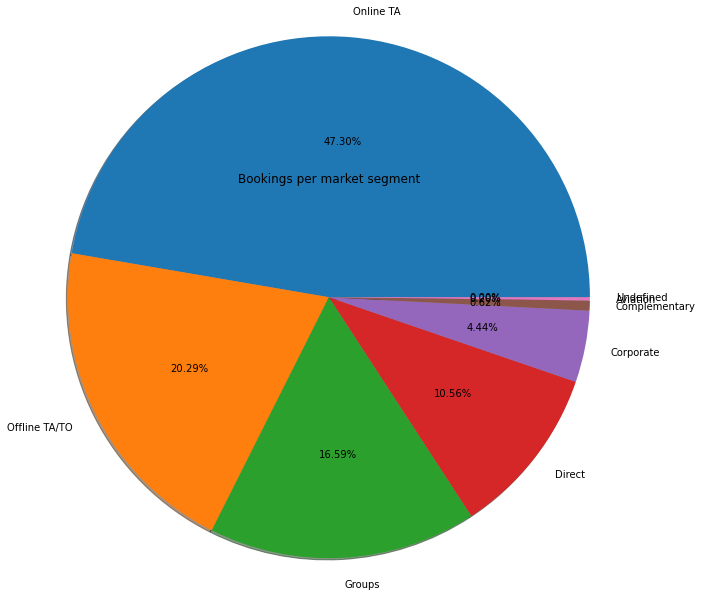

In [28]:
#Bookings by market segment


plt.pie(segments,
        autopct="%1.2f%%", 
        labels=segments.index.values,
       radius=3,
       shadow=True)

plt.title("Bookings per market segment")



47.30% of bookings were made online, 20.29% offline \
The rest were made by groups, corporations, directly at the hotel or by airline packages
